In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import sys
sys.path.append("../..")
import os

import numpy as np
import matplotlib.pyplot as plt

from torch.utils.data import DataLoader

from torchgeo.datasets import LandCoverAI

In [2]:
ROOT_DIR = os.path.expanduser("~/mount/data/")

## Visualization example

In [3]:
train_dataset = LandCoverAI(
    ROOT_DIR,
    split="train",
    download=True,
    checksum=True
)

Files already downloaded and verified


In [4]:
test_dataset = LandCoverAI(
    ROOT_DIR,
    split="test",
    download=True,
    checksum=True
)

Files already downloaded and verified


In [5]:
len(train_dataset), len(test_dataset)

(7470, 1602)

In [6]:
def show_image(sample, title, scale_factor=4):
    im = sample["image"]
    im = np.rollaxis(im.numpy(),0,3).copy() # convert to HxWxC format
    
    mask = sample["mask"].numpy()
        
    fig, axs = plt.subplots(1, 2, figsize=(8,4))
    axs[0].imshow(im)
    axs[0].set_title(f"Image {idx}")
    axs[0].axis("off")
    
    axs[1].imshow(mask, vmin=0, vmax=4)
    axs[1].set_title(f"Mask {idx}")
    axs[1].axis("off")
    plt.show()
    plt.close()

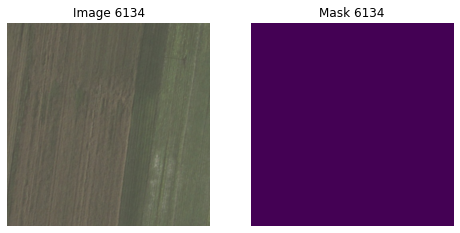

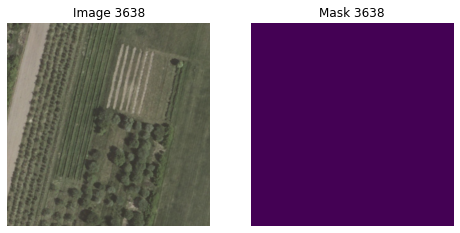

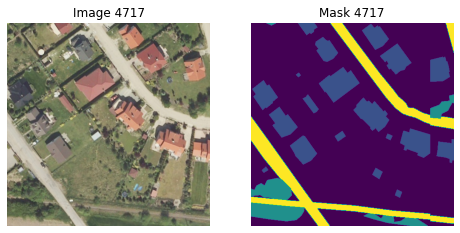

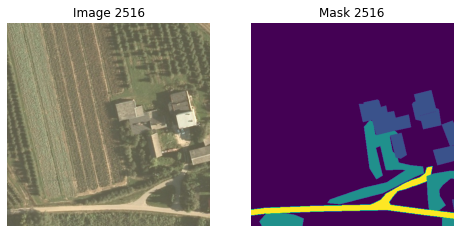

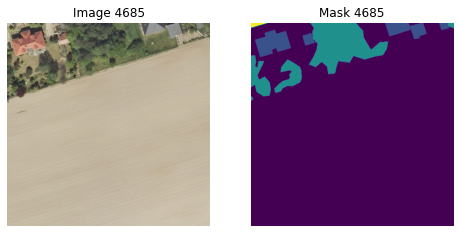

In [7]:
N = len(train_dataset)
for idx in np.random.randint(0, N, size=(5)):
    show_image(train_dataset[idx], idx)

## DataLoader example

In [8]:
dataloader = DataLoader(train_dataset, batch_size=32)

In [9]:
for batch_idx, batch in enumerate(dataloader):
    print(batch["image"].shape)
    if batch_idx == 5:
        break

torch.Size([32, 3, 512, 512])
torch.Size([32, 3, 512, 512])
torch.Size([32, 3, 512, 512])
torch.Size([32, 3, 512, 512])
torch.Size([32, 3, 512, 512])
torch.Size([32, 3, 512, 512])
